# Diagnóstico Inicial da Evasão - CETENS

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

df = pd.read_csv('/home/ramon/extrator/survival/ze_final.csv')

In [2]:
df = df[df['centro'] == 'CETENS']

In [3]:
def permutation_test(events, obs_diff, n1):
    n = len(events)
    n2 = n-n1
    idxs = np.arange(0, n)



    values = []
    for i in range(10000):
        foo = np.full(n, False)
        idx_a = np.random.choice(idxs, n1, replace=False)
        foo[idx_a] = True

        diff = np.abs(events[foo].mean() - events[~foo].mean())
        values.append(diff)

    return (np.mean(np.array(values) > obs_diff))

def proportion_test(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    counts = df[idx].groupby(col_name)['event'].mean().values
    obs_diff = np.abs(counts[0] - counts[1])
    n1 = df[idx][col_name].value_counts().values[0]
    events = df.loc[idx, 'event'].values
    
    return (permutation_test(events, obs_diff, n1))

from statsmodels.stats.proportion import proportions_ztest

def proportion_test2(df, col_name): 
    count = df[idx].groupby(col_name)['event'].sum().values
    nobs = df[idx].groupby(col_name)['event'].count().values

    stat, pval = proportions_ztest(count, nobs)
    return pval

# Perfil dos Estudantes na Amostra

- 82% evadiram
- 56% possuem cidade de origem diferente da cidade do campus
- 42% são do sexo feminino
- Idade média dos estudantes é 26
- 622 estudantes na amostra

In [4]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['event'].value_counts(normalize=True))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())

print(df['matricula'].nunique())


1    0.818328
0    0.181672
Name: event, dtype: float64
1    0.564309
0    0.435691
Name: is_outra_cidade, dtype: float64
1    0.57717
0    0.42283
Name: sexo, dtype: float64
25.89549839228296
622


In [5]:
df.codigoInep.unique()

array([1272132])

# Q.1 Taxa de evasão é maior para estudantes cuja cidade de origem difere da cidade do campus?


- Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (83% vs 80%)
- A diferença não é estatisticamente significativa

   is_outra_cidade  event    percent
0                0      1  79.704797
1                0      0  20.295203
2                1      1  83.475783
3                1      0  16.524217


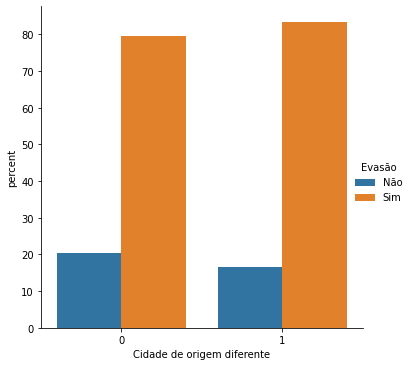

In [6]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event', 'Cidade de origem diferente')

In [7]:
print('%.3f'%(proportion_test(df, 'is_outra_cidade')))
print(proportion_test2(df, 'is_outra_cidade'))

0.207
0.22648751394340916


# Q.2 Taxa de evasão é maior para ingressantes no 1o semestre ou 2o semestre letivo? (Ex: taxa de evasão é maior para ingressantes em 2019.1 ou 2019.2?)

- Taxa de Evasão é maior entre ingressantes no 2o semestre (86% vs 78%)
- A diferença é estatisticamente significativa

1    0.575563
2    0.424437
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  78.491620
1                 1      0  21.508380
2                 2      1  86.363636
3                 2      0  13.636364


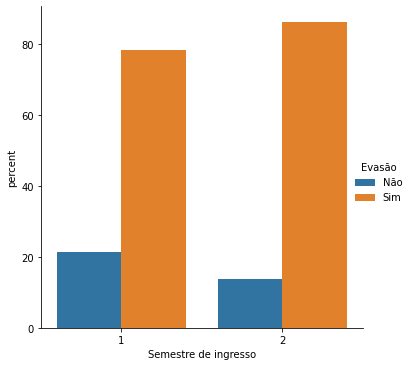

In [8]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event', 'Semestre de ingresso')

In [9]:
print('%.3f'%(proportion_test(df, 'semestreIngresso')))
print(proportion_test2(df, 'semestreIngresso'))

0.011
0.011846921389344121


# Q.3 Em termos gerais, a taxa de evasão é maior no 1o semestre ou 2o semestre do ano letivo? Independentemente do semestre de ingresso do estudante


- Taxa de Evasão é maior no 2o semestre letivo (91% vs 71%). Por quê? O SISU pode ser uma linha de investigação.
- A diferença é estatisticamente significativa

2    0.561093
1    0.438907
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  70.695971
1               1      0  29.304029
2               2      1  90.544413
3               2      0   9.455587


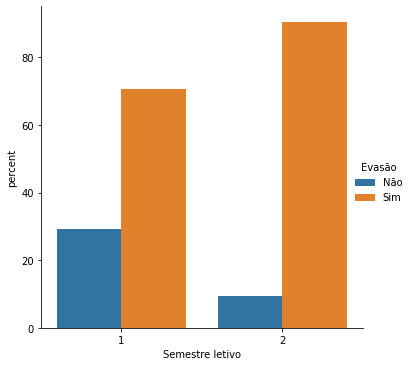

In [10]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event', 'Semestre letivo')

In [11]:
print('%.3f'%(proportion_test(df, 'semestreLetivo')))
print(proportion_test2(df, 'semestreLetivo'))

0.000
1.876212919635219e-10


In [12]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max')) & (df['event'] == 1)
df[idx].groupby('semestreLetivo')['semestreIngresso'].value_counts(normalize=True)

semestreLetivo  semestreIngresso
1               1                   0.720207
                2                   0.279793
2               2                   0.550633
                1                   0.449367
Name: semestreIngresso, dtype: float64

# Q.4 Taxa taxa de evasão é maior para homens ou mulheres?

- A taxa de evasão é maior para homens (82% vs 81%).
- A diferença não é estatisticamente significativa.
- Taxa de evasão para homens tende a crescer a partir do 4o semestre

1    0.57717
0    0.42283
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  80.988593
1     0      0  19.011407
2     1      1  82.451253
3     1      0  17.548747


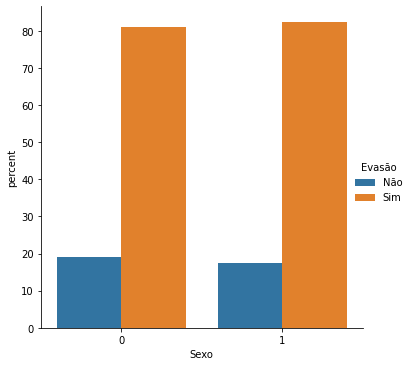

In [13]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event', 'Sexo')

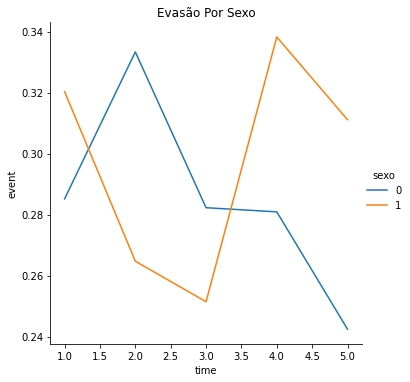

In [14]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

In [15]:
print('%.3f'%(proportion_test(df, 'sexo')))
print(proportion_test2(df, 'sexo'))

0.602
0.640231466168877


# Q.5 Taxa de evasão decresce com o tempo?

- A taxa de evasão é maior no 4o e 5o semsetres quando comparada aos semestres 2 e 3

[Text(0.5, 1.0, 'Evasão Geral')]

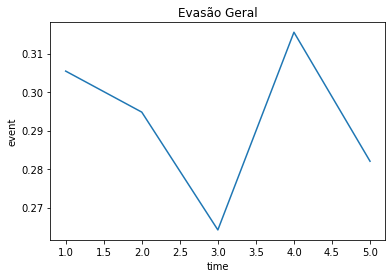

In [16]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

# Q.6 Taxa de evasão difere entre ingressantes por cota e ampla concorrência?

- Taxa de evasão é maior em cotistas (83% vs 80%)
- A diferença não é estatisticamente significativa.
- Taxa de evasão para cotistas tende a crescer nos 4 e 5º semestre

0    0.527331
1    0.472669
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  80.487805
1           0      0  19.512195
2           1      1  83.333333
3           1      0  16.666667


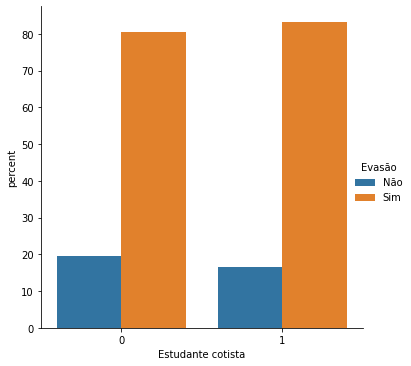

In [17]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event', 'Estudante cotista')

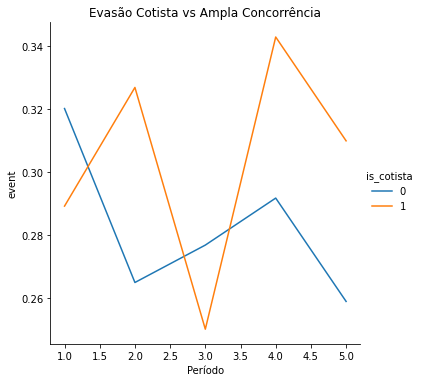

In [18]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência', xlabel='Período')    

In [19]:
print('%.3f'%(proportion_test(df, 'is_cotista')))
print(proportion_test2(df, 'is_cotista'))

0.358
0.3581452812967675


# Q.7 A idade de ingresso afeta a taxa de evasão?

- A idade de ingresso não parece afetar a taxa de evasão

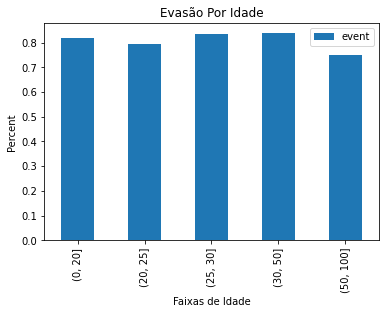

In [20]:
col = 'idade_cat'
df[col] = pd.cut(df.idade_ingresso, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade', xlabel='Faixas de Idade')
plt.show()

# Turno afeta evasão?

In [21]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('turno').agg({'event':'mean'})

,event
turno,
Matutino e Vespertino,0.818328


# Grau afeta evasão?

In [22]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('grau').agg({'event':'mean'})

,event
grau,
Bacharelado,0.818328


# Análise Bivariada

- Calouro e acima de 50 anos aparesenta maior taxa de evasão
- Cotista parece ser responsável pela elavada taxa de evasão no 2, 4 e 5o semestres

Idade Ingresso vs Turno


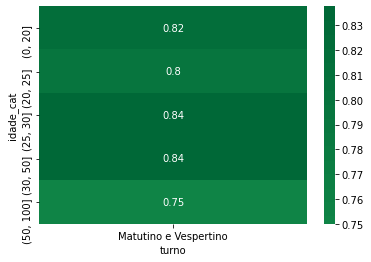

Idade Ingresso vs Grau do Curso


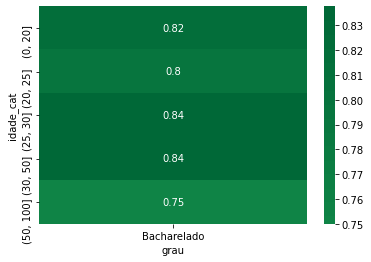

Idade Ingresso vs Sexo


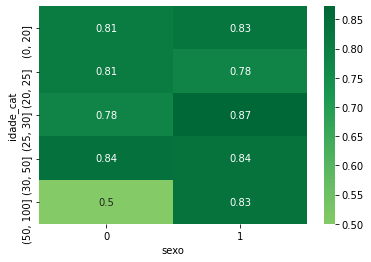

Idade Ingresso vs Cotista


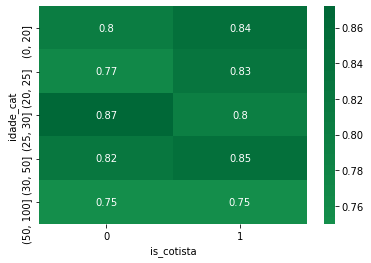

Idade Ingresso vs Migrante


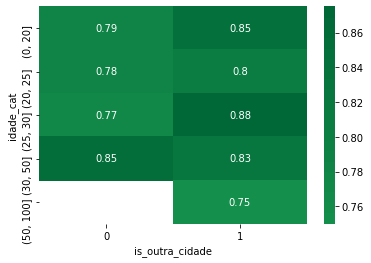

Idade Ingresso vs Período


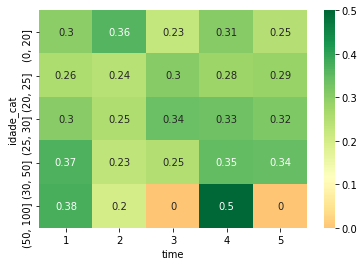

Turno vs Grau do Curso


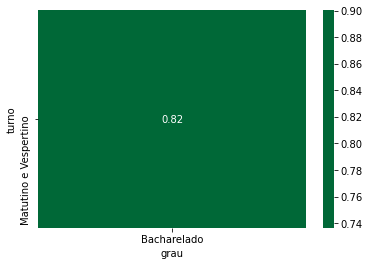

Turno vs Sexo


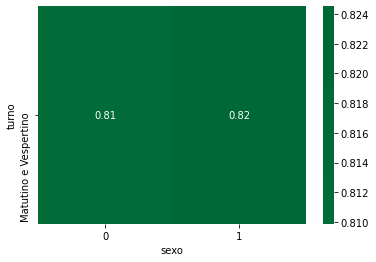

Turno vs Cotista


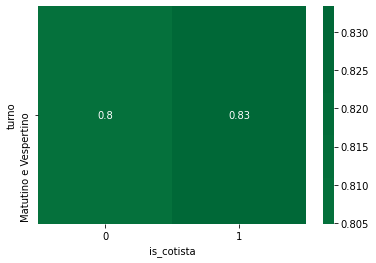

Turno vs Migrante


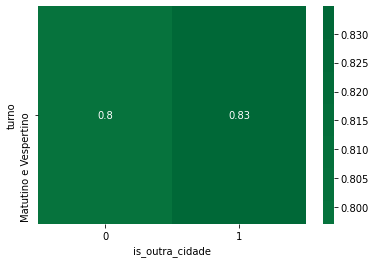

Turno vs Período


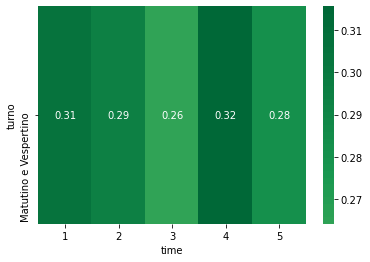

Grau do Curso vs Sexo


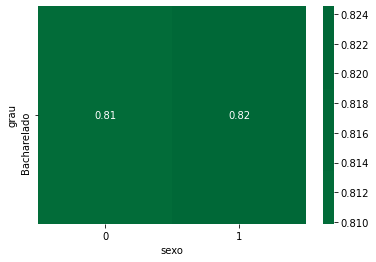

Grau do Curso vs Cotista


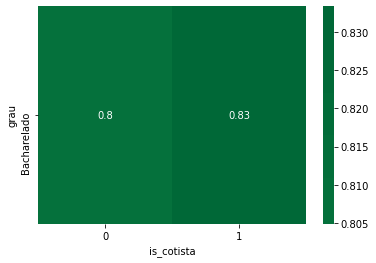

Grau do Curso vs Migrante


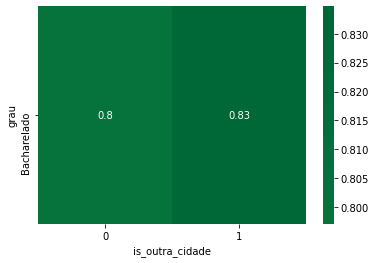

Grau do Curso vs Período


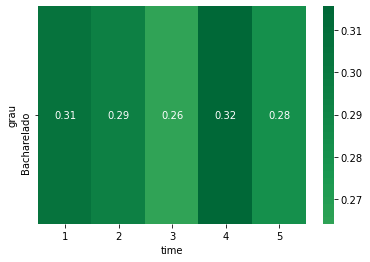

Sexo vs Cotista


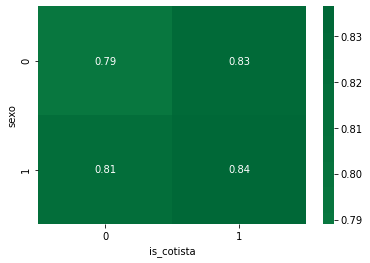

Sexo vs Migrante


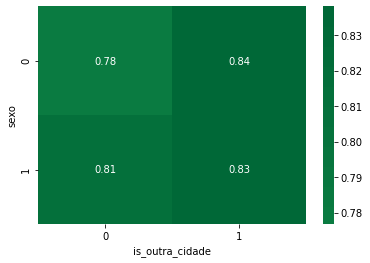

Sexo vs Período


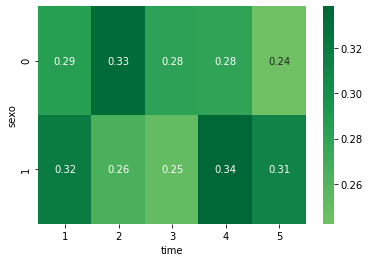

Cotista vs Migrante


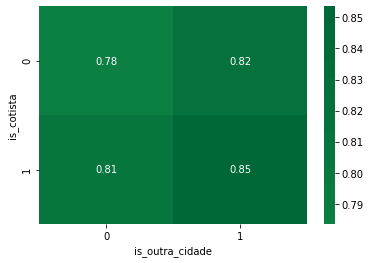

Cotista vs Período


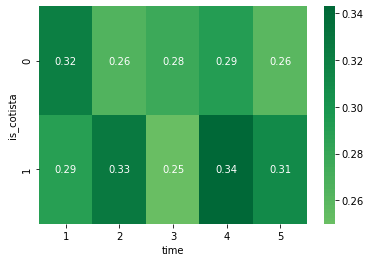

Migrante vs Período


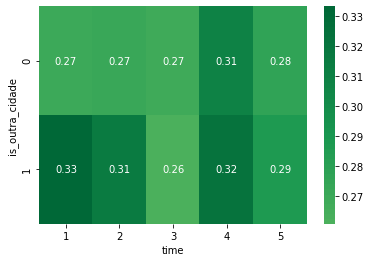

In [23]:
nomes = ['Idade Ingresso', 'Turno', 'Grau do Curso', 'Sexo', 'Cotista', 'Migrante', 'Período']
x = ['idade_cat', 'turno', 'grau', 'sexo', 'is_cotista',  'is_outra_cidade', 'time']

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


for i in range(0, len(x)):
    for j in range(i+1, len(x)):
        print('%s vs %s'%(nomes[i], nomes[j]))
        if x[j] == 'time':
            result = pd.pivot_table(data=df, index=x[i], columns=x[j], values='event')
        else:
            result = pd.pivot_table(data=df[idx], index=x[i], columns=x[j], values='event')
        sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
        plt.show()